In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from genmccd import GenMCCopyDetector
%matplotlib inline

In [2]:
df = pd.read_csv("zipgrade_export_example.csv")

## Initialize model

In [3]:
copy_model = GenMCCopyDetector(df)

## Visualize pairs for which ratio is > 1

<AxesSubplot:>

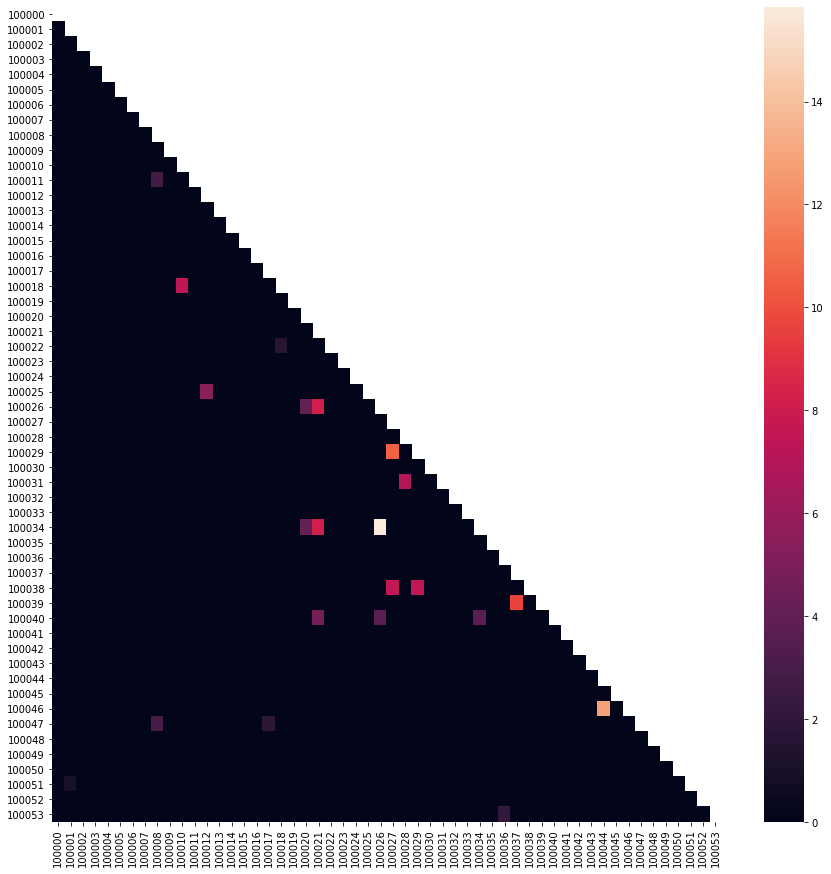

In [4]:
score_df = copy_model.get_copying_logprobs(student_sort_order="id")
plt.figure(figsize=(15,15))
sns.heatmap(score_df, vmin=0)

## Find top pairs

In [5]:
copy_model.print_top_scores(n=10)

15.84619 Adrianna Alsbrooks   Isela Ioli          
15.84619 Isela Ioli           Adrianna Alsbrooks  
12.81027 Suzy Spaniel         Ute Unga            
12.81027 Ute Unga             Suzy Spaniel        
10.62074 Britany Buskirk      Delmar Dupree       
10.62074 Delmar Dupree        Britany Buskirk     
9.61228 Neoma Nevala         Lori Lowes          
9.61228 Lori Lowes           Neoma Nevala        
8.20234 Adrianna Alsbrooks   Vada Velverton      
8.20234 Isela Ioli           Vada Velverton      
